In [77]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
data_dir = "../Data/Quora-Data/"

In [3]:
df_test = pd.read_csv(data_dir + "pre-processing/test_EDA1_preprocessing_with_lemma_EDA2_glove.csv")
df_train = pd.read_csv(data_dir + "pre-processing/train_EDA1_preprocessing_with_lemma_EDA2_glove.csv")

In [35]:
pd.options.display.max_columns = 4000
df_train.head()

,id,qid1,qid2,q1_orig,q2_orig,num_word_q1,num_word_q2,num_char_q1,num_common_words,first_word_same,last_word_same,first_2_same,last_2_same,common_word_ratio,num_sent_diff,num_word_diff_ratio,question1,question2,num_word_q1_proc,num_word_q2_proc,num_char_q1_proc,num_common_words_proc,first_word_same_proc,last_word_same_proc,first_2_same_proc,last_2_same_proc,common_word_ratio_proc,num_sent_diff_proc,num_word_diff_ratio_proc,lcs_ratio_max,lcs_ratio_min,fuzz_rat,fuzz_part_rat,fuzz_rat_proc,fuzz_part_rat_proc,Y,glv_q1_0,glv_q1_1,glv_q1_2,glv_q1_3,glv_q1_4,glv_q1_5,glv_q1_6,glv_q1_7,glv_q1_8,glv_q1_9,glv_q1_10,glv_q1_11,glv_q1_12,glv_q1_13,glv_q1_14,glv_q1_15,glv_q1_16,glv_q1_17,glv_q1_18,glv_q1_19,glv_q1_20,glv_q1_21,glv_q1_22,glv_q1_23,glv_q1_24,glv_q1_25,glv_q1_26,glv_q1_27,glv_q1_28,glv_q1_29,glv_q1_30,glv_q1_31,glv_q1_32,glv_q1_33,glv_q1_34,glv_q1_35,glv_q1_36,glv_q1_37,glv_q1_38,glv_q1_39,glv_q1_40,glv_q1_41,glv_q1_42,glv_q1_43,glv_q1_44,glv_q1_45,glv_q1_46,glv_q1_47,glv_q1_48,glv_q1_49,glv_q2_0,glv_q2_1,glv_q2_2,glv_q2_3,glv_q2_4,glv_q2_5,glv_q2_6,glv_q2_7,glv_q2_8,glv_q2_9,glv_q2_10,glv_q2_11,glv_q2_12,glv_q2_13,glv_q2_14,glv_q2_15,glv_q2_16,glv_q2_17,glv_q2_18,glv_q2_19,glv_q2_20,glv_q2_21,glv_q2_22,glv_q2_23,glv_q2_24,glv_q2_25,glv_q2_26,glv_q2_27,glv_q2_28,glv_q2_29,glv_q2_30,glv_q2_31,glv_q2_32,glv_q2_33,glv_q2_34,glv_q2_35,glv_q2_36,glv_q2_37,glv_q2_38,glv_q2_39,glv_q2_40,glv_q2_41,glv_q2_42,glv_q2_43,glv_q2_44,glv_q2_45,glv_q2_46,glv_q2_47,glv_q2_48,glv_q2_49
0,394437,434361,527326,how do i install apk files on my windows phone?,"how can i backup a (.xap, / . appx) file insta...",10,15,10,6,1,1,0.5,1.0,0.230769,0.40,0.192308,install apk file window phone ?,"backup ( .xap , / . appx ) file installed wind...",6,13,6,4,0,1,0.0,1.0,0.230769,0.40,0.192308,0.267857,0.468750,0.61,0.74,0.53,0.84,0,0.574287,0.952050,-4.277600,-0.549085,-1.295090,-0.486051,4.119830,-3.576410,5.513970,2.382081,2.206471,1.446930,-16.645241,-1.701020,-1.327406,-0.610185,3.171266,0.393000,-0.45594,-0.731443,-5.777350,-2.023494,-0.215490,-1.148629,-3.765890,-1.912476,-1.026341,-0.831048,0.002410,3.238470,-0.544527,1.105740,0.738860,-4.517820,4.226392,-1.189130,1.245238,-1.476610,0.025200,-0.919003,-2.916834,5.118820,-3.509770,0.234040,2.361523,-1.118637,-3.009320,-1.617396,-0.426610,0.953710,2.140900,-1.313500,-2.522428,0.573515,-3.194859,2.150905,5.845458,-2.264090,1.683018,4.030598,4.147276,3.470965,-30.612049,-1.277566,0.043689,-2.880514,3.830866,-0.331105,-3.382467,-5.671059,-4.095040,-5.607650,0.250640,-1.685527,-1.027150,-6.354444,-1.618650,-1.929915,7.662377,4.665900,-3.675701,0.095530,-2.800520,-2.321861,8.122553,-1.460872,-1.616915,0.181258,-0.171130,-3.287157,-11.664200,8.680750,-4.210682,-0.877618,3.577368,-3.228940,-3.090590,-2.63903,-2.586603,-2.678800
1,373988,8023,10567,what were the major effects of the cambodia ea...,what were the major effects of the cambodia ea...,21,21,21,16,1,0,1.0,0.5,0.372093,0.00,0.000000,"major effect cambodia earthquake , effect comp...","major effect cambodia earthquake , effect comp...",11,11,11,7,1,1,1.0,0.5,0.372093,0.00,0.000000,0.657895,0.675676,0.94,0.94,0.90,0.89,1,-0.120880,3.837722,-1.053720,-3.296465,-0.714010,2.445542,2.620588,-4.252527,2.054083,-1.490960,0.663928,-5.806901,-23.884239,2.102450,4.855162,1.754219,3.643057,1.556430,3.11736,-3.867201,0.359980,-1.031261,-0.102270,-1.187550,1.001988,0.255240,-2.029098,3.563557,0.492540,0.968195,-0.603531,-1.257331,2.177843,-3.343814,4.474693,-1.517522,-3.877770,2.829770,2.312590,-0.481157,-6.212583,-3.802020,1.042250,0.677330,-2.902514,0.860566,-2.069741,0.767630,-2.543561,5.639610,0.218250,3.793712,-1.008630,-3.577785,-0.443080,2.070685,3.082438,-4.096248,1.530493,-1.377540,1.013253,-6.569045,-24.380604,2.047170,5.645012,1.124069,3.458947,0.988615,3.093950,-3.801201,0.641560,-1.593431,0.551240,-1.327090,0.829188,-0.625410,-1.796490,3.897860,0.992240,0.587566,-0.530769,-1.864751,1.506843,-2.741164,4.074643,-1.022972,-3.846110,2.669610,1.824077,0.12894

In [18]:
all_questions_df=df_train[['question1','question2','Y']]

In [224]:
all_questions_subset=all_questions_df.iloc[0:600,:]

In [117]:
all_questions=np.append(all_questions_subset['question1'].values.astype('U'),all_questions_subset['question2'].values.astype('U'),0)

In [118]:
cv=CountVectorizer()

In [119]:
X = cv.fit_transform(all_questions)
X_arr = X.toarray()

In [120]:
bow=pd.DataFrame(X_arr, columns = cv.get_feature_names())

In [121]:
tf_trans=TfidfTransformer(smooth_idf=True,use_idf=True)

In [122]:
tf_trans.fit(X)

TfidfTransformer()

In [123]:
X

<6000x6971 sparse matrix of type '<class 'numpy.int64'>'
	with 31893 stored elements in Compressed Sparse Row format>

In [124]:
wd=WordCloud()

In [125]:
wd.fit_words(cv.vocabulary_)

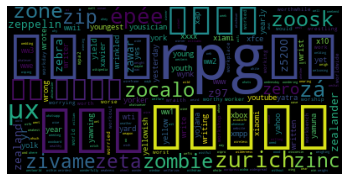

In [126]:
plt.imshow(wd)
plt.axis("off")
plt.show()

In [225]:
dup_questions=all_questions_subset.loc[all_questions_subset['Y'] == 1]
diff_questions=all_questions_subset.loc[all_questions_subset['Y'] == 0]

In [226]:
dups=np.append(dup_questions['question1'].values.astype('U'),dup_questions['question2'].values.astype('U'),0)
diffs=np.append(diff_questions['question1'].values.astype('U'),diff_questions['question2'].values.astype('U'),0)

In [227]:
cv_dup=CountVectorizer()
dup_vector=cv_dup.fit_transform(dups)

In [228]:
cv_diff=CountVectorizer()
diff_vector=cv_diff.fit_transform(diffs)

In [233]:
wd_dups=WordCloud(width = 3000, height = 2000, 
                background_color ='white',
                max_font_size = 400,
                min_font_size = 10,
                max_words=300)
wd_dups.fit_words(cv_dup.vocabulary_)

In [237]:
wd_diffs=WordCloud(width = 3000, height = 2000, 
                background_color ='white',
                max_font_size = 200,
                min_font_size = 10,
                max_words=300)
wd_diffs.fit_words(cv_diff.vocabulary_)

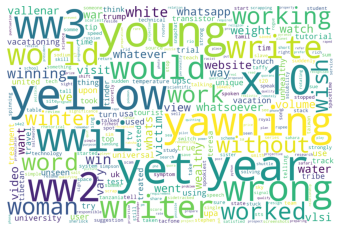

In [235]:
plt.imshow(wd_dups)
plt.axis("off")
plt.show()

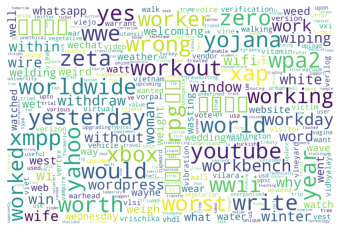

In [238]:
plt.imshow(wd_diffs)
plt.axis("off")
plt.show()